<a href="https://colab.research.google.com/github/el-muarrof/MachineLearning/blob/main/Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Detection Using CNN

**IDC classification using keras**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DatasetML/

/content/drive/MyDrive/DatasetML


In [ ]:
#!mkdir DatasetML

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/DatasetML/"

In [ ]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.10G/3.10G [00:49<00:00, 45.7MB/s]



In [ ]:
!unzip breast-histopathology-images.zip -d /content/drive/MyDrive/DatasetML/breast-histopathology-images

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/DatasetML/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: /content/drive/MyDrive/DatasetML/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: /content/drive/MyDrive/DatasetML/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: /content/drive/MyDrive/DatasetML/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: /content/drive/MyDrive/DatasetML/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: /content/drive/MyDrive/DatasetML/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: /content/drive/MyDrive/DatasetML/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x

In [ ]:
from glob import glob
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import os

In [ ]:
files = glob('/content/drive/MyDrive/DatasetML/breast-histopathology-images/*/*/*')

In [ ]:
len(files)

278082

In [ ]:
count =0 
for file in files:
    if file[-5] == '1':
        count+=1
print(count)

78838


In [ ]:
len(files)

278082

In [ ]:
def show_img(files):
    plt.figure(figsize= (10,10))
    ind = np.random.randint(0, len(files), 25)
    i=0
    for loc in ind:
        plt.subplot(5,5,i+1)
        sample = load_img(files[loc], target_size=(150,150))
        sample = img_to_array(sample)
        plt.axis("off")
        plt.imshow(sample.astype("uint8"))
        i+=1

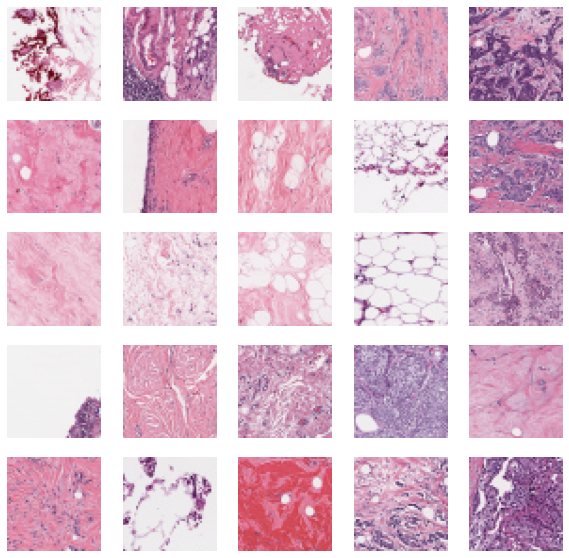

In [ ]:
show_img(files)

In [ ]:
def load_data(files, lower_limit, upper_limit):
    X = []
    y = []
    for file in files[lower_limit:upper_limit]:
        if file.endswith(".png"):
            img = load_img(file, target_size = (50,50))
            pixels = img_to_array(img)
            pixels /= 255
            X.append(pixels)
            if(file[-5] == '1'):
                y.append(1)
            elif(file[-5] == '0'):
                y.append(0)
    return np.stack(X), y
        
    

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the data into training set
X_train,y_train = load_data(files,0, 9000)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


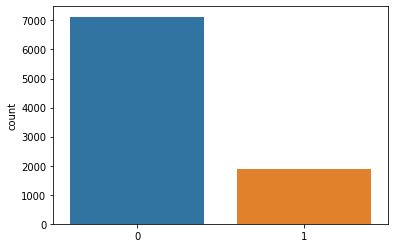

In [ ]:
sns.countplot(y_train)

In [ ]:
X_test, y_test = load_data(files, 9000, 11000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


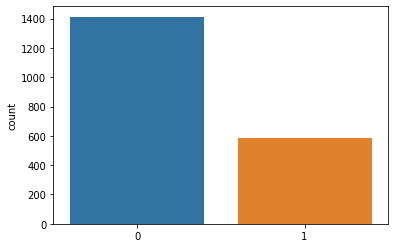

In [ ]:
sns.countplot(y_test)

## Handling Class Imbalance Problem 

In [ ]:
files[:5]

['/content/drive/MyDrive/DatasetML/breast-histopathology-images/10253/0/10253_idx5_x1001_y1001_class0.png',
 '/content/drive/MyDrive/DatasetML/breast-histopathology-images/10253/0/10253_idx5_x1001_y1051_class0.png',
 '/content/drive/MyDrive/DatasetML/breast-histopathology-images/10253/0/10253_idx5_x1001_y1101_class0.png',
 '/content/drive/MyDrive/DatasetML/breast-histopathology-images/10253/0/10253_idx5_x1001_y1151_class0.png',
 '/content/drive/MyDrive/DatasetML/breast-histopathology-images/10253/0/10253_idx5_x1001_y1201_class0.png']

In [ ]:
def load_balanced_data(files, size, start_index):
    half_size = int(size/2)
    count=0
    res = []
    y = []
    for file in files[start_index:]:
        if (count!=half_size):
            if file[-5] == '1' and file.endswith(".png"):
                img = load_img(file, target_size = (50,50))
                pixels = img_to_array(img)
                pixels /= 255
                res.append(pixels)
                y.append(1)
                count += 1
                
    for file in files[start_index:]:
        if(count!=0):
            if(file[-5] == '0'):
                img = load_img(file, target_size = (50,50))
                pixels = img_to_array(img)
                pixels /= 255
                res.append(pixels)
                y.append(0)
                count -= 1
    return np.stack(res), y
    
            

In [ ]:
X_train2, y_train2 = load_balanced_data(files, 9000,0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


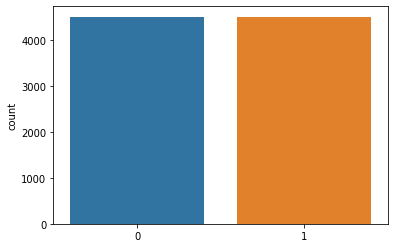

In [ ]:
sns.countplot(y_train2)

In [ ]:
x_test2, y_test2 = load_balanced_data(files, 2000, 10000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


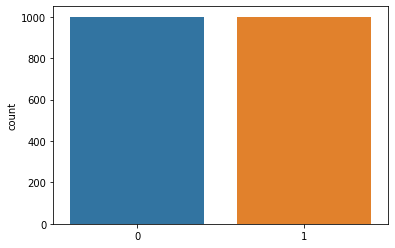

In [ ]:
sns.countplot(y_test2)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Conv2D, Activation, MaxPooling2D, Flatten, BatchNormalization
from tensorflow import keras

In [ ]:
#Creation And Architecture of Concolutional Neural Network
def def_model(inp_shape = (50,50,3)):
    inp = Input(inp_shape)
    m = Conv2D(32, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(inp)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(64, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Flatten()(m)
    m = Dense(128, activation = "relu")(m)
    out = Dense(1, activation = "sigmoid")(m)
    model = Model(inp, out)
    model.compile(optimizer = keras.optimizers.SGD(1e-3, momentum=0.9), loss="binary_crossentropy", metrics = ['acc'])
    return model

In [ ]:
model = def_model()

In [ ]:
#describe the CNN Model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0     

In [ ]:
#Training The CNN Model with 25 Epochs
history = model.fit(np.array(X_train2), np.array(y_train2), validation_data=(np.array(x_test2), np.array(y_test2)), epochs = 25, batch_size=256)

Epoch 1/25
36/36 [==============================] - 2s 59ms/step - loss: 0.2077 - acc: 0.9203 - val_loss: 0.3418 - val_acc: 0.8715
Epoch 2/25
36/36 [==============================] - 2s 54ms/step - loss: 0.2004 - acc: 0.9256 - val_loss: 0.3430 - val_acc: 0.8650
Epoch 3/25
36/36 [==============================] - 2s 55ms/step - loss: 0.1898 - acc: 0.9301 - val_loss: 0.3282 - val_acc: 0.8860
Epoch 4/25
36/36 [==============================] - 2s 56ms/step - loss: 0.1847 - acc: 0.9346 - val_loss: 0.3451 - val_acc: 0.8820
Epoch 5/25
36/36 [==============================] - 2s 55ms/step - loss: 0.1774 - acc: 0.9383 - val_loss: 0.3536 - val_acc: 0.8775
Epoch 6/25
36/36 [==============================] - 2s 55ms/step - loss: 0.1717 - acc: 0.9411 - val_loss: 0.3072 - val_acc: 0.8970
Epoch 7/25
36/36 [==============================] - 2s 55ms/step - loss: 0.1675 - acc: 0.9428 - val_loss: 0.3124 - val_acc: 0.8845
Epoch 8/25
36/36 [==============================] - 2s 55ms/step - loss: 0.1612 - a

In [ ]:
model.save('model1.h5')

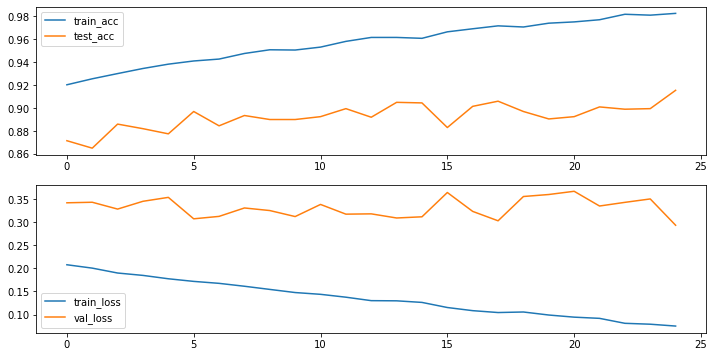

In [ ]:
#plot the accuracy graph
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(history.history['acc'], label="train_acc")
plt.plot(history.history['val_acc'], label = "test_acc")
plt.legend()
plt.subplot(2,1,2)
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()

**Trying Dropout and Data Augmentation**

In [ ]:
def def_model2(inp_shape = (50,50,3)):
    inp = Input(inp_shape)
    m = Conv2D(32, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(inp)
    m = MaxPooling2D(2)(m)
    m = Conv2D(64, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Conv2D(256, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)

    m = Dropout(0.2)(m)
    m = Flatten()(m)

    m = Dense(128, activation = "relu")(m)
    out = Dense(1, activation = "sigmoid")(m)
    model = Model(inp, out)
    model.compile(optimizer = keras.optimizers.SGD(1e-3, momentum=0.9), loss="binary_crossentropy", metrics = ['acc'])
    return model

In [ ]:
model2 = def_model2()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Using ImageDataGenerator To Generate similar images
datagen = ImageDataGenerator(height_shift_range=0.2,
                            width_shift_range=0.2,
                            zoom_range=0.2,
                            shear_range=0.2)

In [ ]:
train_generator = datagen.flow(X_train2, y_train2, batch_size=256)
val_generator = datagen.flow(x_test2, y_test2, batch_size=256)

In [ ]:
#Training The Model using train_generator and val_generator
history2 = model2.fit(train_generator, validation_data=val_generator, epochs = 25)

Epoch 1/25
36/36 [==============================] - 13s 345ms/step - loss: 0.6653 - acc: 0.6214 - val_loss: 0.6033 - val_acc: 0.6335
Epoch 2/25
36/36 [==============================] - 12s 327ms/step - loss: 0.4900 - acc: 0.7878 - val_loss: 0.4402 - val_acc: 0.8335
Epoch 3/25
36/36 [==============================] - 12s 335ms/step - loss: 0.4250 - acc: 0.8197 - val_loss: 0.4644 - val_acc: 0.7775
Epoch 4/25
36/36 [==============================] - 12s 330ms/step - loss: 0.4116 - acc: 0.8231 - val_loss: 0.3936 - val_acc: 0.8405
Epoch 5/25
36/36 [==============================] - 12s 332ms/step - loss: 0.3994 - acc: 0.8303 - val_loss: 0.3546 - val_acc: 0.8650
Epoch 6/25
36/36 [==============================] - 12s 332ms/step - loss: 0.3905 - acc: 0.8337 - val_loss: 0.3781 - val_acc: 0.8415
Epoch 7/25
36/36 [==============================] - 13s 371ms/step - loss: 0.3851 - acc: 0.8321 - val_loss: 0.3569 - val_acc: 0.8650
Epoch 8/25
36/36 [==============================] - 12s 331ms/step - 

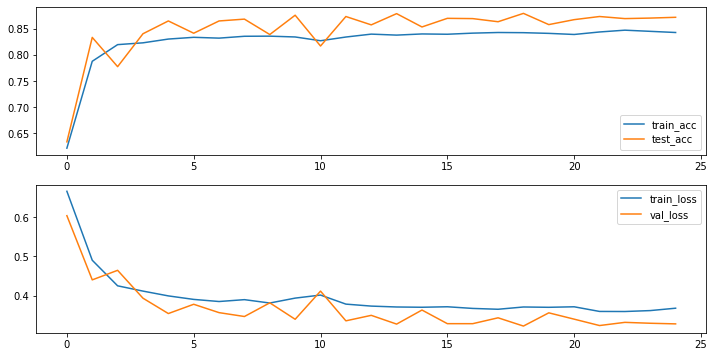

In [ ]:
#plot accuracy and loss graph
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(history2.history['acc'], label="train_acc")
plt.plot(history2.history['val_acc'], label = "test_acc")
plt.legend()
plt.subplot(2,1,2)
plt.plot(history2.history['loss'], label = "train_loss")
plt.plot(history2.history['val_loss'], label = "val_loss")
plt.legend()

In [ ]:
model2.save('model2.h5')

In [ ]:
#Testing The CNN Model
pred = model2.predict(x_test2)

In [ ]:
#Classification To check wether IDC or Not IDC
res = []
for prediction in pred:
    if(prediction > 0.5):
        res.append(1)
    else:
        res.append(0)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Final Classification Report using Confusion Matrix
print(confusion_matrix(y_test2, res))
print(classification_report(y_test2, res))

[[883 117]
 [121 879]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1000
           1       0.88      0.88      0.88      1000

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



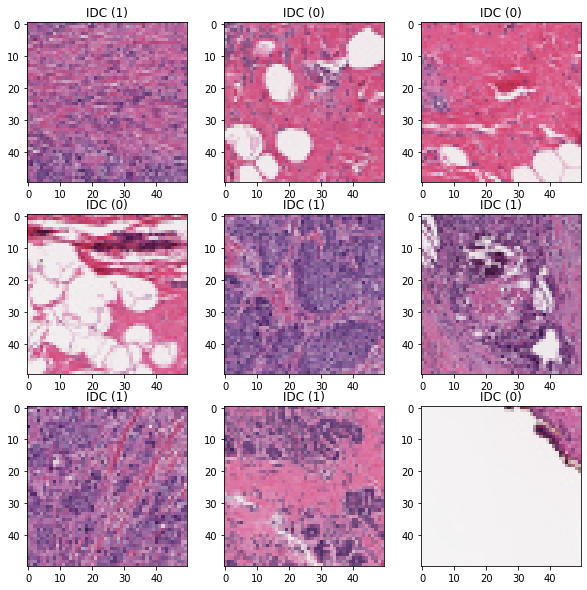

In [ ]:

plt.figure(figsize= (10,10))
ind = np.random.randint(0, len(pred), 9)
i=0
#The patient having IDC is represented by IDC 1 ,IDC 0 otherwise.
for loc in ind:
    plt.subplot(3,3,i+1)
    plt.xlabel(None)
    plt.title("IDC ({})".format(res[loc]))
        
    plt.imshow(x_test2[loc])
    i+=1